<a href="https://colab.research.google.com/github/aknsntn/visualisation/blob/main/Tables_and_Visualisation_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуальный анализ

*Все задания выполняются только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`, `plotly`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных композиций.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

> **NB!** *Для выполнения задания возьмите 30 тысяч случайных строк из датасета.*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_palette('flare')
sns.set(rc = {'figure.figsize':(20,12)})

In [ ]:
data = pd.read_csv('sample_data/music_genre.csv')
data.head(3)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.7920,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.9500,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.0118,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic


In [ ]:
df = data[data['duration_ms'] > 0].dropna()
len(df)

45061

In [ ]:
df = df[df['tempo'] != '?']
df = df[df['artist_name'] != 'empty_field']
len(df)

38556

In [ ]:
df = df.sample(n=30000)

# Часть 1

## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

Text(0.5, 1.0, 'Корреляционная матрица')

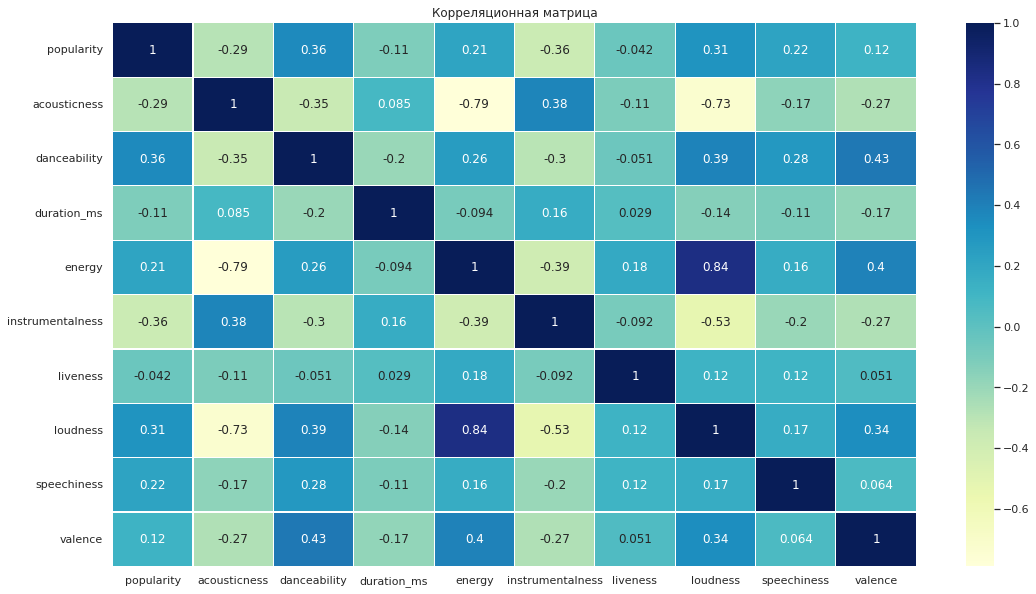

In [ ]:
sns.heatmap(df.drop(['instance_id'], axis = 1).corr(), annot=True, linewidths=.2, cmap="YlGnBu").set_title('Корреляционная матрица')

Таким образом, `duration_ms` слабо влияет на какие-либо характеристики, так как его корреляции с другими столбцами ближе всего к 0. 

Сильно связаны `energy` и `loudness` - корреляция 0.84.

Высокую отрицательную корреляцию имеют пары `energy` и `acousticness`, `loudness` и `acousticness`, что говорит об их обратных зависимостях.

## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

Text(0.5, 1.0, 'Разброс instrumentalness к loudness')

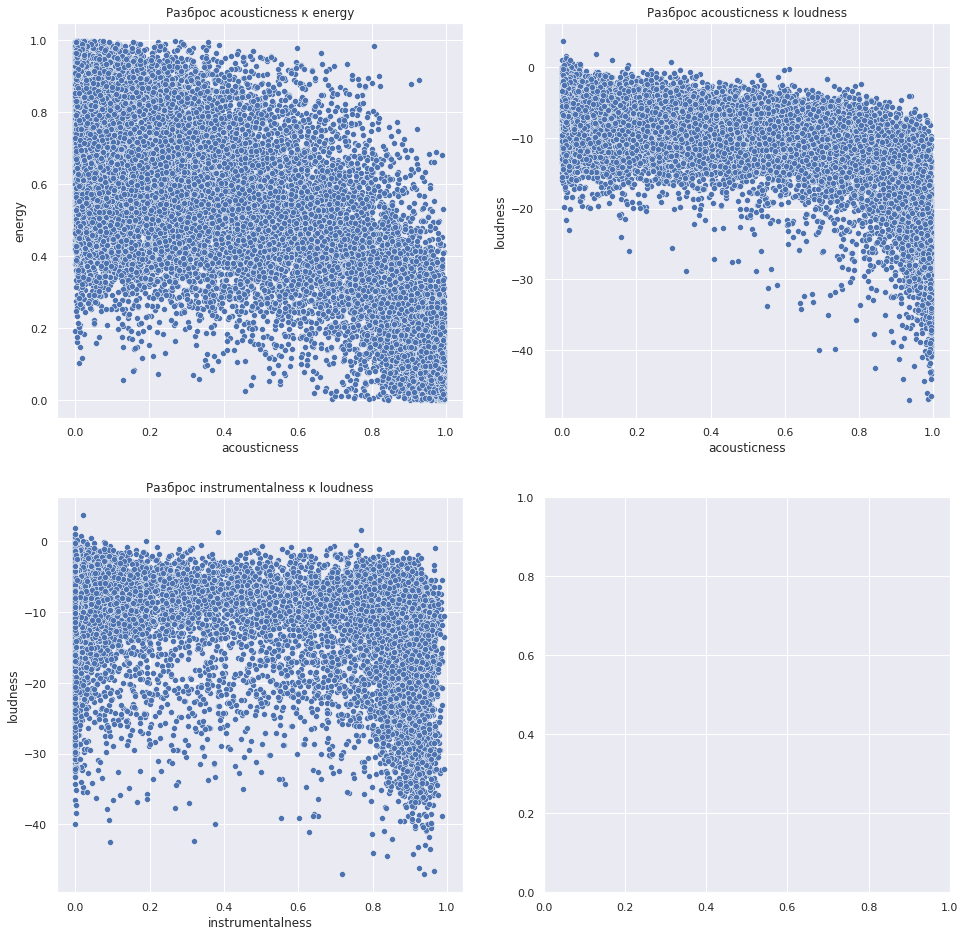

In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(16, 16))
sns.scatterplot(ax=axis[0,0], data=df, x='acousticness', y='energy').set_title('Разброс acousticness к energy')
sns.scatterplot(ax=axis[0,1], data=df, x='acousticness', y='loudness').set_title('Разброс acousticness к loudness')
sns.scatterplot(ax=axis[1,0], data=df, x='instrumentalness', y='loudness').set_title('Разброс instrumentalness к loudness')

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

In [ ]:
counts = pd.DataFrame(df.value_counts('music_genre'), columns = ['count'])
counts
max = counts['count'].max()
values = np.array(counts['count'])

Text(0.5, 1.0, 'Количство треков по жанрам')

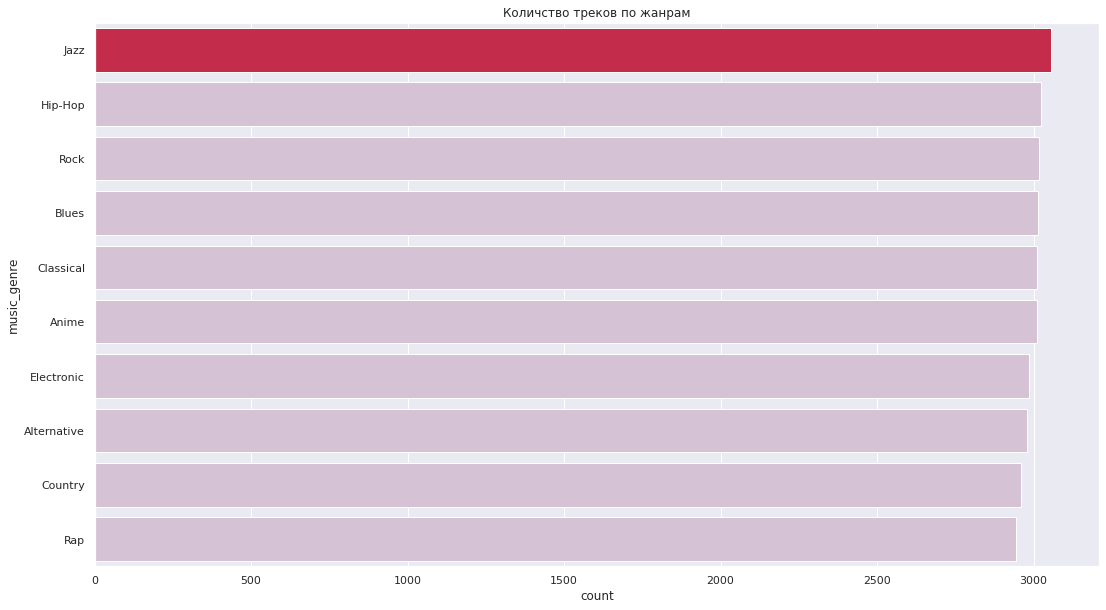

In [ ]:
colours = ['thistle' if (x < max) else 'crimson' for x in values]
sns.barplot(y=counts.index, x=counts['count'], palette = colours, color = colours).set_title('Количство треков по жанрам')

## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

In [ ]:
top_df = counts.head(3)
genres = np.array(top_df.index)

In [ ]:
top_df = top_df.merge(df, how = 'inner', on = 'music_genre')

In [ ]:
top_1 = top_df[top_df['music_genre'] == genres[0]].groupby(['artist_name', 'music_genre'], as_index = False).sum().sort_values(by='popularity', ascending=False).head(3)
top_2 = top_df[top_df['music_genre'] == genres[1]].groupby(['artist_name', 'music_genre'], as_index = False).sum().sort_values(by='popularity', ascending=False).head(3)
top_3 = top_df[top_df['music_genre'] == genres[2]].groupby(['artist_name', 'music_genre'], as_index = False).sum().sort_values(by='popularity', ascending=False).head(3)

In [ ]:
top = top_1.merge(top_2.merge(top_3, how = 'outer'), how = 'outer')

In [ ]:
import plotly.express as px

fig = px.sunburst(top, path=['music_genre', 'artist_name'], values= 'popularity')
fig.show()

## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

In [ ]:
most_popular = df.groupby('music_genre').mean().sort_values(by = 'popularity', ascending = False).head(1)
least_popular = df.groupby('music_genre').mean().sort_values(by = 'popularity', ascending = False).tail(1)

In [ ]:
sub = most_popular.reset_index(drop=True).sub(least_popular.reset_index(drop=True), axis = 'index').drop(columns=['instance_id', 'duration_ms', 'popularity']).T.abs().sort_values(0)

In [ ]:
sub

,0
liveness,0.002354
valence,0.014946
energy,0.019574
acousticness,0.108107
speechiness,0.120994
danceability,0.225825
instrumentalness,0.271340
loudness,1.177233


In [ ]:
min_sub = sub.head(4)
max_sub = sub.tail(4)

In [ ]:
min_means1 = least_popular.T.reset_index().merge(min_sub.reset_index().drop(columns=0), left_on = 'index', right_on = 'index').T
max_means1 = most_popular.T.reset_index().merge(min_sub.reset_index().drop(columns=0), left_on = 'index', right_on = 'index').T
min_means1.columns = min_means1.iloc[0]
max_means1.columns = max_means1.iloc[0]

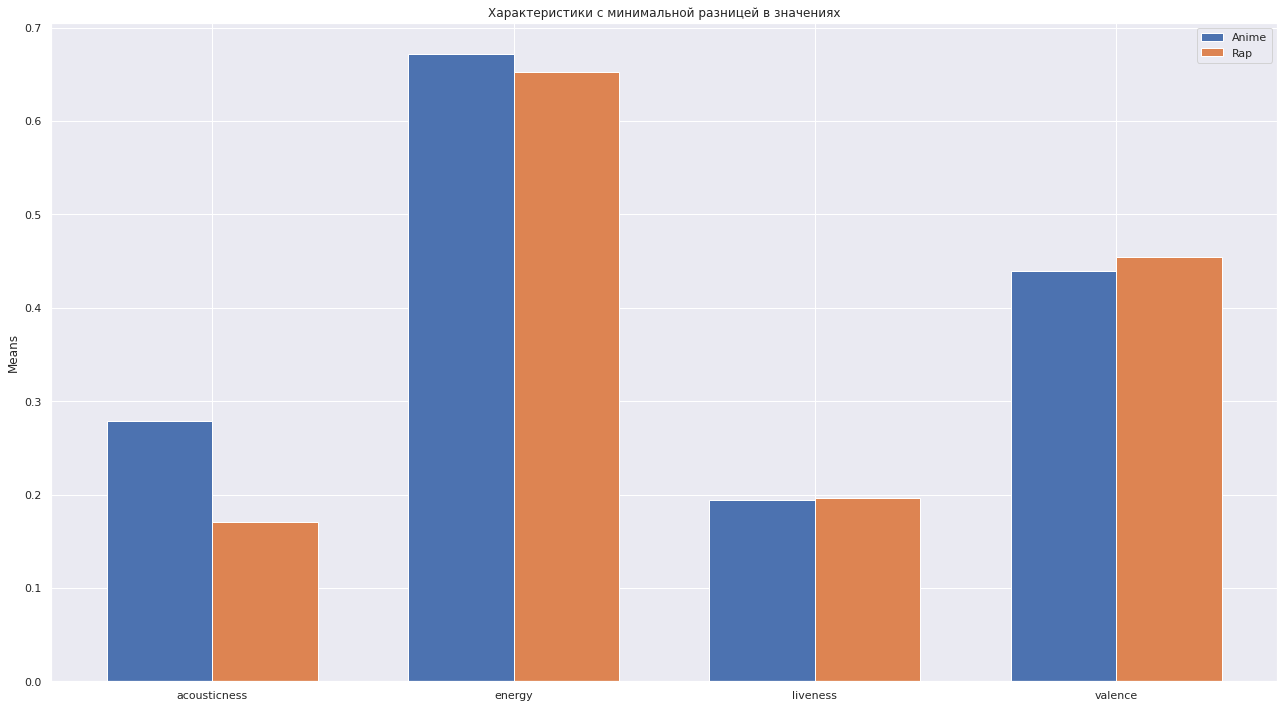

In [ ]:
labels = list(min_sub.index.sort_values().values)
min_means1 = min_means1.drop(min_means1.index[0]).squeeze()
max_means1 = max_means1.drop(max_means1.index[0]).squeeze()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, min_means1, width, label = least_popular.index.values[0])
rects2 = ax.bar(x + width/2, max_means1, width, label = most_popular.index.values[0])

ax.set_ylabel('Means')
ax.set_title('Характеристики с минимальной разницей в значениях')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
min_means2 = least_popular.T.reset_index().merge(max_sub.reset_index().drop(columns=0), left_on = 'index', right_on = 'index').sort_values(by = 'index').T
max_means2 = most_popular.T.reset_index().merge(max_sub.reset_index().drop(columns=0), left_on = 'index', right_on = 'index').sort_values(by = 'index').T
min_means2.columns = min_means2.iloc[0]
max_means2.columns = max_means2.iloc[0]

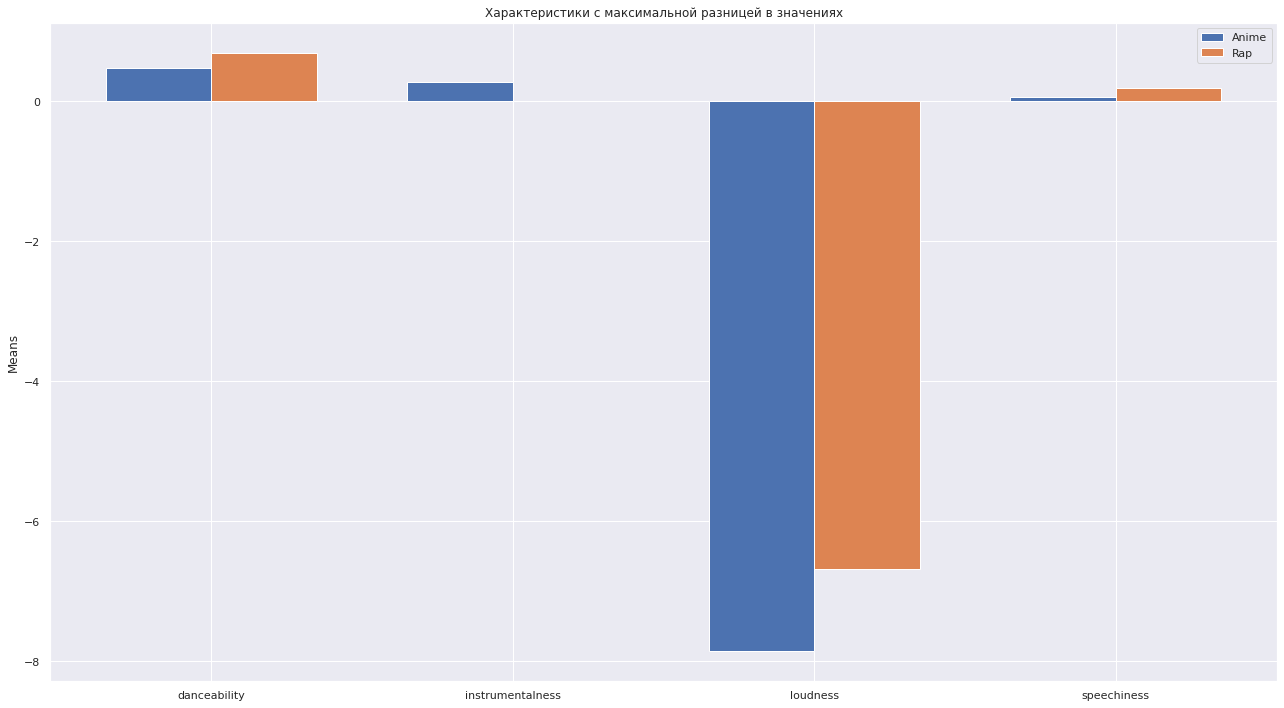

In [ ]:
labels2 = list(max_sub.index.sort_values().values)
min_means2 = min_means2.drop(min_means2.index[0]).squeeze()
max_means2 = max_means2.drop(max_means2.index[0]).squeeze()

x = np.arange(len(labels2))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, min_means2, width, label = least_popular.index.values[0])
rects2 = ax.bar(x + width/2, max_means2, width, label = most_popular.index.values[0])

ax.set_ylabel('Means')
ax.set_title('Характеристики с максимальной разницей в значениях')
ax.set_xticks(x)
ax.set_xticklabels(labels2)
ax.legend()

fig.tight_layout()

plt.show()

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

In [ ]:
df.head(3)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
5659,53209.0,ROOKiEZ is PUNK'D,Hands up,12.0,0.000806,0.548,306373.0,0.876,0.0,B,0.356,-3.457,Major,0.0546,129.987,4-Apr,0.595,Anime
46209,66320.0,Yo Gotti,Rake It Up - Diplo & Party Favor Remix,63.0,0.126000,0.878,172987.0,0.933,0.0,C#,0.531,-3.093,Minor,0.2770,154.006,4-Apr,0.601,Hip-Hop
47563,45942.0,BROCKHAMPTON,ZIPPER,66.0,0.249000,0.835,202087.0,0.681,0.0,G#,0.180,-4.357,Major,0.1110,113.98899999999999,4-Apr,0.687,Hip-Hop


In [ ]:
df['duration_ms'].mode()

0    240000.0
dtype: float64

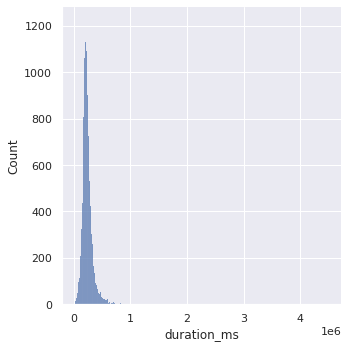

In [ ]:
sns.displot(x='duration_ms', fill = True, data = df)

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df = df.sort_values('duration_ms')

In [ ]:
step = (df['duration_ms'].mode().values - df['duration_ms'].min())/2

In [ ]:
step = step[0]
step

112245.5

In [ ]:
df_1 = df[df['duration_ms'] <= (step + df['duration_ms'].min())]
df_2 = df[(df['duration_ms'] > (step + df['duration_ms'].min())) & (df['duration_ms'] <= (2.3 * step))]
df_3 = df[df['duration_ms'] > (2.3 * step)]

In [ ]:
df_1['track_duration'] = 'short'
df_2['track_duration'] = 'medium'
df_3['track_duration'] = 'long'

In [ ]:
df = df_3.merge(df_1.merge(df_2, how = 'outer'), how = 'outer')

Text(0.5, 0.98, 'График распределения значений громкости по категориям длительности')

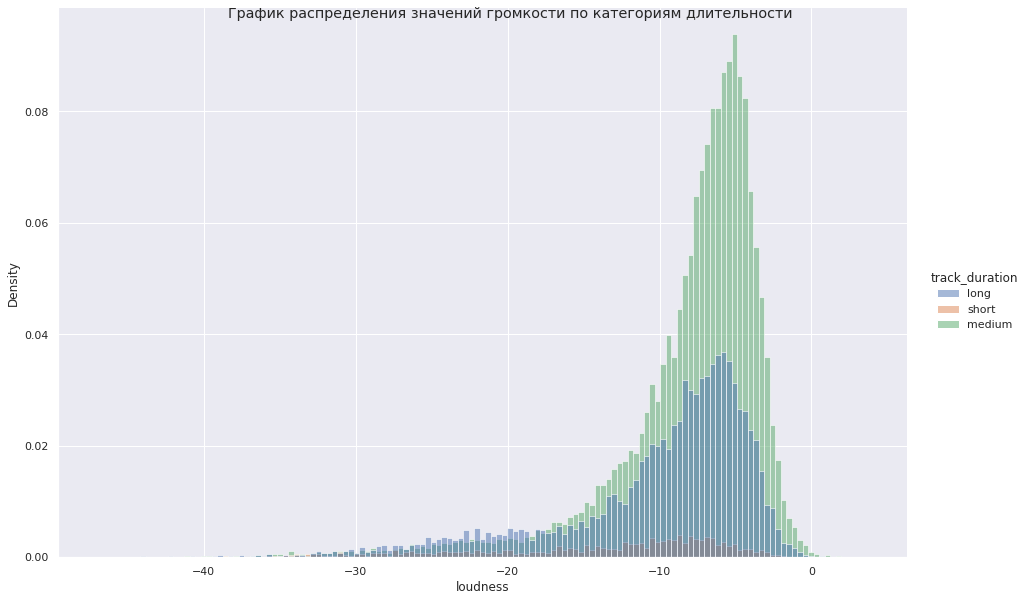

In [ ]:
f = sns.displot(x='loudness', hue = 'track_duration', fill = True, data = df, stat = "density", height=8.5, aspect=13/8.5)
f.fig.suptitle('График распределения значений громкости по категориям длительности')

## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

Text(0.5, 1.0, 'Отношение популярности треков к жанру')

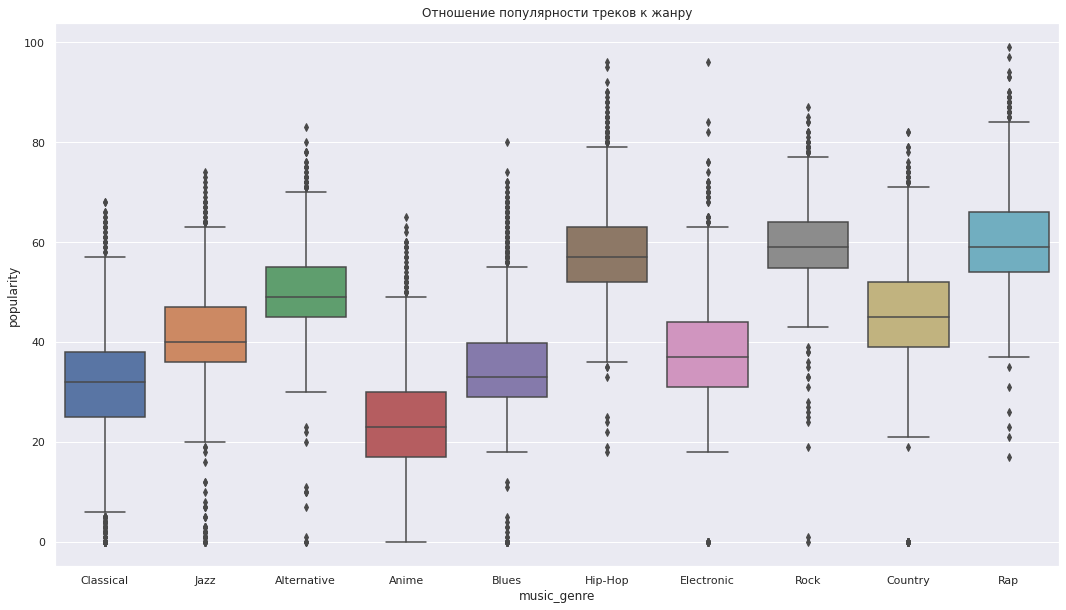

In [ ]:
sns.boxplot(data=df, x="music_genre", y="popularity").set_title('Отношение популярности треков к жанру')

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

In [ ]:
pie_data = pd.DataFrame(df['track_duration'].value_counts()) # при использовани df почему-то сбиваются лейблы категорий, поэтому новая табличка

In [ ]:
pie_data

,track_duration
medium,18773
long,9811
short,1416


In [ ]:
fig = px.pie(df, names=pie_data.index, values=pie_data.track_duration, labels=df.index, hole=.5)
fig.show()

# Часть 2 (выполнение на R не обязательно)

Для второй части задания будем использовать другой датасет: о распределении Starbucks по всему миру. Датасет возьмем [отсюда](https://www.kaggle.com/starbucks/store-locations).

## Задание 9

Покажите на карте количество кофеен в каждой стране, данные о которой есть в датасете.

In [ ]:
df_coffee = pd.read_csv('sample_data/directory.csv')
df_coffee.head(3)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39


In [ ]:
codes = pd.read_csv('https://raw.githubusercontent.com/aknsntn/visualisation/main/data1.csv')
codes = codes.drop(columns=['Numeric code', 'ISO 3166-2'])
codes.head(3)

,name,Alpha-2 code,Alpha-3 code
0,Afghanistan,AF,AFG
1,Åland Islands,AX,ALA
2,Albania,AL,ALB


In [ ]:
!pip install plotly

In [ ]:
coffeeshops = df_coffee.groupby('Country')['Brand'].count().reset_index().rename(columns={'Brand':'number'})
coffeeshops.head(3)

,Country,number
0,AD,1
1,AE,144
2,AR,108


In [ ]:
graph_data = coffeeshops.merge(codes, how='left', left_on='Country', right_on='Alpha-2 code')
graph_data.head(3)

,Country,number,name,Alpha-2 code,Alpha-3 code
0,AD,1,Andorra,AD,AND
1,AE,144,United Arab Emirates,AE,ARE
2,AR,108,Argentina,AR,ARG


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=graph_data['Alpha-3 code'],
    z=graph_data['number'].astype(float),
    colorscale='blugrn',
    autocolorscale=False,
    marker_line_color='white',
    colorbar_title='number of sb'
))

fig.update_layout(
    title_text='number of sb')

fig.update_geos(
    visible=False, resolution=50,
    showcountries=False, 
    showsubunits=False, projection_type='natural earth')

fig.show()

## Задание 10

Покажите на диаграмме вида treemap количество кофеен в каждой стране каждого региона мира, данные о которых есть в датасете. Страну подписывайте названием, а не ее кодом.

In [ ]:
df_ctr = px.data.gapminder().query("year == 2007").drop(columns=['year', 'lifeExp', 'gdpPercap', 'iso_alpha', 'iso_num'])
df_ctr

,country,continent,pop
11,Afghanistan,Asia,31889923
23,Albania,Europe,3600523
35,Algeria,Africa,33333216
47,Angola,Africa,12420476
59,Argentina,Americas,40301927
...,...,...,...
1655,Vietnam,Asia,85262356
1667,West Bank and Gaza,Asia,4018332
1679,"Yemen, Rep.",Asia,22211743
1691,Zambia,Africa,11746035


In [ ]:
df_prep = graph_data.drop(columns=['Country', 'Alpha-2 code'])

In [ ]:
df_merged = df_ctr.merge(df_prep, how = 'right', left_on = 'country', right_on = 'name')
df_merged = df_merged.drop(columns = 'country').dropna()
df_merged.head(3)

,continent,pop,number,name,Alpha-3 code
2,Americas,40301927.0,108,Argentina,ARG
3,Europe,8199783.0,18,Austria,AUT
4,Oceania,20434176.0,22,Australia,AUS


In [ ]:
fig = px.treemap(df_merged, path=[px.Constant("world"), 'continent', 'name'], values='pop',
                  color='number', hover_data=['Alpha-3 code'],
                  color_continuous_scale='blugrn',
                  color_continuous_midpoint=np.average(df_merged['number'], weights=df_merged['pop']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()